### Numpy
`numpy` is an ndarray-based data structure (n-dimensional) 

In [17]:
import numpy as np
np.array([1,2,3])

array([1, 2, 3])

`numpy` supports many similar properties to Python arrays 


In [18]:
a = np.array([1, 3, 2])
len(a)

3

In [19]:
a.sort()
a

array([1, 2, 3])

### Numpy's arange() 
This is very similar to Python's range() function. Here's Python's range


In [20]:
r = range(17)
r

range(0, 17)

In [21]:
list(r)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

### Numpy's arange() 

In [22]:
a = np.arange(17)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

### Numpy arrays vs Normal Python Arrays
Numpy supports more compact  and faster array processing including linear algebra operations

In [ ]:
[3 * i for i in r]


With Numpy? We can simply do this on our `a` numpy-array object from above to get the same result with no need for list comprehension or looping

In [23]:
3 * a

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48])

In [24]:
# can also apply other math operators
a**2

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144,
       169, 196, 225, 256])

### Numpy arrays support faster array processing than Python ones 

In [25]:
%%timeit
[i**2 for i in range(1000)] 

324 µs ± 1.71 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [27]:
%%timeit
import numpy as np
np.arange(1000)**2  

2.08 µs ± 42.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Numpy array slicing. Run the following in code cells checking your array at each step
1. a[0, :]            # first row
2.  a[:, 0]            # first column
3. A = a[0: 2, 0:2]  # combining  colones with number ranges for subarrays
4. A = a[:2, :2]     # more simply

### Numpy constants, Functions and Linear Spacing -- test out following
1. import math
2. math.e
3. np.e
4. math.e == np.e
5. np.pi   # numby also defines a pi but no tau.. but you can get tau like this
6. math.tau

Run and test these out in code cells!


### Numpy trig & log functions -- test these out
1. np.cos(math.tau)
2. np.sin(math.tau)
3. np.log(np.e)
4. np.log10(np.e)  # NB: numpy uses log() to denote the natural log and log10 for base 10!
5. np.pi

Run and check these out documenting your understanding in Markdown cells


### linespace function
The `linspace()` function is often used to create an array with much finer spacing using a larger number of points.e.g: 100 points of cos x can be obtained with following code lines:
1. angles = np.linspace(0, math.tau, 100)
2. angles

Test this out!

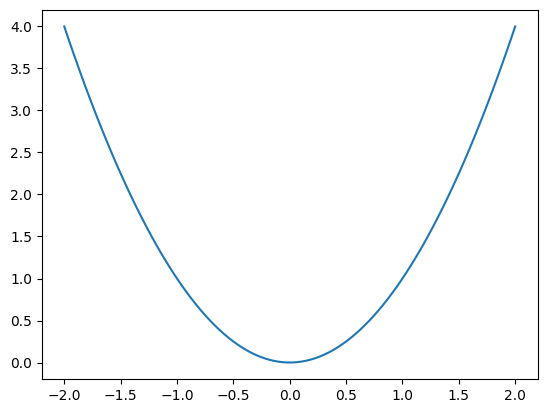

In [12]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, x*x)
plt.show()
%matplotlib inline

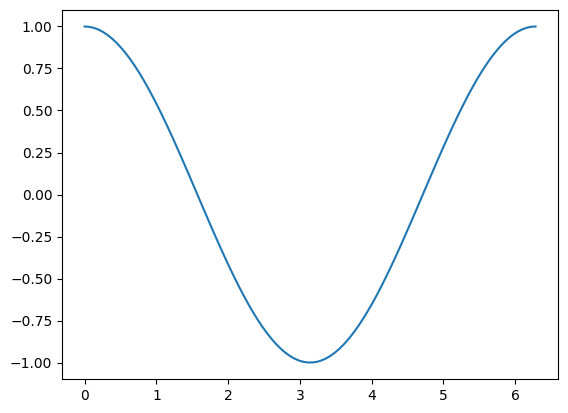

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from math import tau
x = np.linspace(0, tau, 100)
fig, ax = plt.subplots()

#To make a plot of the cosine function, we can then call the ax object’s plot() method with x 
# (x-axis) values equal to our 100 linearly spaced points and y-axis values as: np.cos on x:
ax.plot(x, np.cos(x))
plt.show()
%matplotlib inline


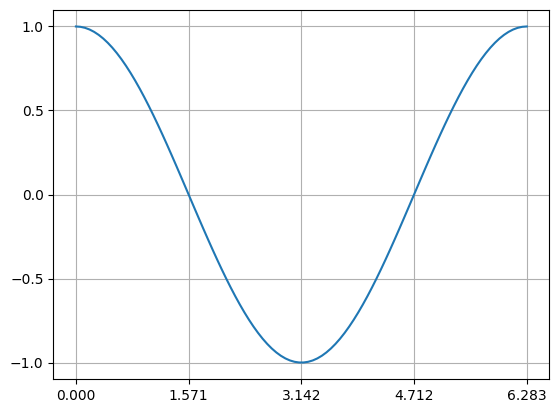

In [14]:
fig, ax = plt.subplots()
ax.set_xticks([0, tau/4, tau/2, 3*tau/4, tau])
ax.set_yticks([-1, -1/2, 0, 1/2, 1])
plt.grid(True)

ax.plot(x, np.cos(x))
plt.show()

# Scatter Plots
The plot above introduced some of the key ideas of Matplotlib, and from this point there are a million possible ways to go. In this section and the next, we’ll focus on two kinds of visualizations especially important in data science: scatter plots and histograms. 
A scatter plot just plots a bunch of discrete function values against the corresponding points, which is a great way to get an overall sense of what relationships the function values might satisfy. Let’s take a look at a concrete example to see what this means.

We’ll begin by generating some random points chosen from the standard normal distribution,14 which is a normal distribution (or “bell curve”) with an average value (mean) of 0 and a spread (standard deviation) of 1.15 We can obtain these values using NumPy’s random library, which includes a default random number generator called __default_rng()__


In [1]:
from numpy.random import default_rng
rng = default_rng()
n_pts = 50
x = rng.standard_normal(n_pts)
x


array([-2.66865176,  0.96581186, -0.69465386,  0.1283529 ,  0.17688152,
        0.05090428, -0.50947238,  0.78168304,  0.1438574 ,  0.04892988,
       -2.00207192,  0.93807825, -0.59764487,  0.56380262,  0.46308548,
        0.41536745, -0.21132288, -1.14501457, -0.84140159, -0.3719395 ,
        0.33030515, -0.8965733 , -0.8081595 , -0.54725568,  1.04478532,
        0.24917468,  0.32730554, -0.72512377,  0.55112127,  0.07288131,
       -1.28678875,  1.31610074,  1.07745629, -2.06397409, -0.42987361,
        0.02824329,  1.08722571, -0.47457347, -0.75478285,  0.22495625,
        2.30001332,  0.62513551,  0.2063433 ,  0.10946065,  1.00697833,
        0.35047719, -0.5744429 , -1.2790336 ,  0.13995285,  0.38854763])

With those x values in hand, let’s create a set of y values by adding a constant multiple (the slope) of 5 times x plus another random factor:

In [2]:
y = 5*x + rng.standard_normal(n_pts)

This broadly follows the pattern of the equation for a line, y = mx + b, only with random values for x and b. Because the functional form of y is essentially linear, a plot of y vs. x should look roughly like a line, which we can confirm with a scatter plot as follows:

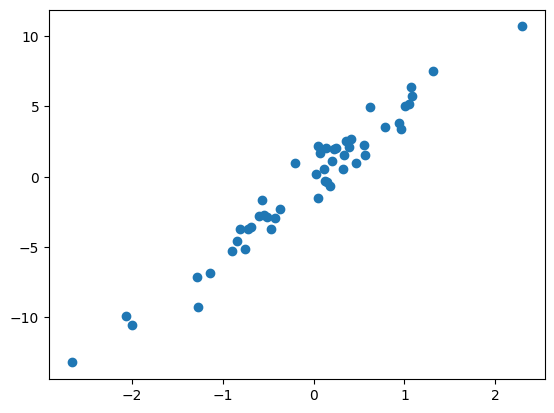

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import tau
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()


## Histograms
Finally, let’s apply some of the same ideas from above to visualize the distribution of 1000 random values drawn from the standard normal distribution:

In [5]:
values = rng.standard_normal(1000)

A common way to get a sense of what these values look like is to make a fixed number of “bins” and plot how many values fit into each bin. The resulting plot is known as a **histogram**, and can be generated automatically using Matplotlib’s hist() method: (The result should be a good approximation of a “bell curve”)

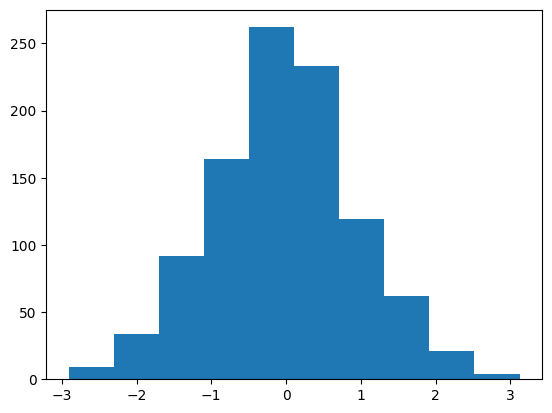

In [6]:
fig, ax = plt.subplots()
ax.hist(values)
plt.show()


# Handcrafted Examples - Hand-crafted Examples 
The first steps to getting started are nearly always to import numpy as np and pandas as pd, along with matplotlib.pyplot as plt:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The core data structures of pandas are Series and DataFrame. The DataFrame is key, but it’s built up from the Series and both encapsulate an Index object denoting what the name says!
## Series
A Series is essentially a fancy array with elements of arbitrary types (much like a list), each of which is called an axis. For example, the following command defines a Series of numbers and strings, plus a special (and commonly encountered) value known as NaN (“Not a Number”):

In [9]:
pd.Series([1, 2, 3, "foo", np.nan, "bar"])

0      1
1      2
2      3
3    foo
4    NaN
5    bar
dtype: object

### Using dropna() to clean the data
The dropna() method drops any “Not Available” values, such as None, NaN, or NaT (“Not a Time”).
By default, Series axis labels are numbered just like array indices (in this case, 0–5). The set of axes is known as the index of the Series:

In [11]:
pd.Series([1, 2, 3, "foo", np.nan, "bar"]).index 

RangeIndex(start=0, stop=6, step=1)

We can also define our own axis labels (indices), which must have the same number of elements as the Series:

In [15]:
from numpy.random import default_rng
rng = default_rng()
s = pd.Series(rng.standard_normal(5), index=["a", "b", "c", "d", "e"])
s

a    1.513554
b   -0.721113
c    2.613528
d   -0.518396
e    1.020205
dtype: float64

We can use our indices as dictionary keys 

In [16]:
s['c']

2.6135282391706385

Indeed call the keys() method on s should prove the point

In [17]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

### Series Methods
Series come equipped with a wealth of methods, including plotting methods that use Matplotlib under the hood. For example, here’s a histogram for a Series with 1000 values generated with the standard normal distribution:

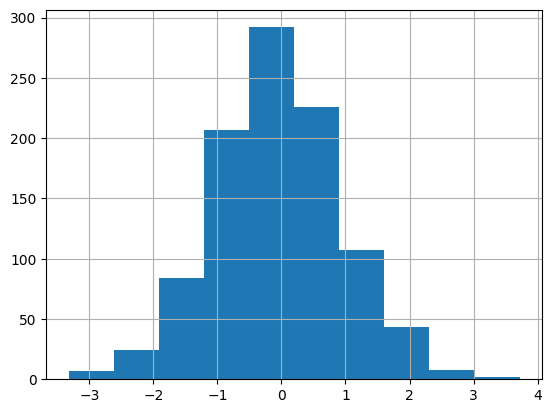

In [18]:
s = pd.Series(rng.standard_normal(1000))
s.hist()
plt.show()


## DataFrame
DataFrame object is the heart of Python data analysis. A DataFrame can be thought of as a two-dimensional grid of cells containing arbitrary data types—roughly equivalent to an Excel worksheet. Let's see how to create a simple DataFrame by hand just to get a sense of how they work, but as you know already  in most cases DataFrame objects are created by importing data from files you typically download from the web
There are a large number of ways to initialize or build DataFrames appropriate to a correspondingly large number of circumstances. For example: Initializing a DataFrame with a Python dictionary.


In [19]:
from math import tau
from numpy.random import default_rng
rng = default_rng()
df = pd.DataFrame({
  "Number": 1.0,
  "String": "foo",
  "Angles": np.linspace(0, tau, 5),
  "Random": pd.Series(rng.standard_normal(5)),
  "Timestamp": pd.Timestamp("20221020"),
  "Size": pd.Categorical(["tiny", "small", "mid", "big", "huge"])
})
df

,Number,String,Angles,Random,Timestamp,Size
0,1.0,foo,0.000000,1.212651,2022-10-20,tiny
1,1.0,foo,1.570796,2.321306,2022-10-20,small
2,1.0,foo,3.141593,0.536224,2022-10-20,mid
3,1.0,foo,4.712389,2.100150,2022-10-20,big
4,1.0,foo,6.283185,1.485294,2022-10-20,huge


Here we’ve applied the `linspace()` method and two new pandas methods, `TimeStamp` (just what it sounds like) and `Categorical` (which contains values of a categorical variable). The result is a set of labeled rows and columns with a heterogeneous set of data. We can access a DataFrame column using the column name as a key as in code cell below:


In [20]:
df["Size"]

0     tiny
1    small
2      mid
3      big
4     huge
Name: Size, dtype: category
Categories (5, object): ['big', 'huge', 'mid', 'small', 'tiny']

We can also `calculate statistics`, such as the mean value of the Random column:

In [21]:
df["Random"].mean()

1.5311249592599838

One useful pandas function for getting a general overview of numeric data is `describe()`:

In [22]:
df.describe()

,Number,Angles,Random
count,5.0,5.000000,5.000000
mean,1.0,3.141593,1.531125
std,0.0,2.483647,0.714411
min,1.0,0.000000,0.536224
25%,1.0,1.570796,1.212651
50%,1.0,3.141593,1.485294
75%,1.0,4.712389,2.100150
max,1.0,6.283185,2.321306


This automatically displays the `total count`, `mean`, `standard deviation`, `minimum`, and `maximum values`, and the `middle three quartiles (25%, 50%, and 75%)` of each **numeric column**. These values won’t always be meaningful—the standard deviation of the linearly spaced angles, for example, doesn’t really tell us anything useful— but `describe()` is often helpful as a first step in an analysis. Two other useful summary methods are `head()` and `info()` which you already know. Another useful method is `map()`, which we can use to map categorical values to numbers. Suppose, for example, that **"Size"** corresponds to drink sizes in ounces, which we can represent as a sizes dictionary. Using `map()` on the "Size" column should then produce the desired result as below:

In [23]:
sizes = {"tiny": 4, "small": 8, "mid": 12, "big": 16, "huge": 24}
df["Size"].map(sizes)


0     4
1     8
2    12
3    16
4    24
Name: Size, dtype: category
Categories (5, int64): [16, 24, 12, 8, 4]

### The Example Nobel Lauretes Dataset
As you know already the most common practice is to load data from external files and then take the analysis from there. The most common input format is CSV files (for “comma-separated values”). Your typical first step is to download your dataset. For example you can download the winners of the Nobel Prize, who are typically known as laureates (a reference to the ancient practice of using wreaths from a laurel tree to honor great accomplishments). You can do this with the commandline tool - curl:  <curl -OL http://api.nobelprize.org/v1/laureate.csv>: We can then read the data using panda's `read_csv()` function:


In [3]:
nobel = pd.read_csv("laureates.csv")

The statistics for the numeric columns aren’t very meaningful, so describe() doesn’t tell us much:

In [4]:
nobel.describe()

,id,year,share
count,1000.000000,1000.000000,1000.000000
mean,509.099000,1973.721000,2.027000
std,298.130617,34.523195,0.944014
min,1.000000,1901.000000,1.000000
25%,250.750000,1949.750000,1.000000
50%,500.500000,1979.000000,2.000000
75%,764.250000,2003.000000,3.000000
max,1034.000000,2023.000000,4.000000


Let's investigate the `head()` or top entries of the Nobel Prize data. 

In [5]:
nobel.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901,physics,NaN,1,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903,physics,NaN,2,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903,physics,NaN,4,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


Here it shows the top 5 but if you want more you can do `head(n)` subsituting n for how many you want to see! We can get more useful info using `info()`:

In [6]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1000 non-null   int64 
 1   firstname          1000 non-null   object
 2   surname            968 non-null    object
 3   born               999 non-null    object
 4   died               1000 non-null   object
 5   bornCountry        969 non-null    object
 6   bornCountryCode    969 non-null    object
 7   bornCity           966 non-null    object
 8   diedCountry        653 non-null    object
 9   diedCountryCode    653 non-null    object
 10  diedCity           647 non-null    object
 11  gender             1000 non-null   object
 12  year               1000 non-null   int64 
 13  category           1000 non-null   object
 14  overallMotivation  23 non-null     object
 15  share              1000 non-null   int64 
 16  motivation         1000 non-null   object
 

This produces a complete list of the column names, together with the number of non-null values for each one.
## Locating Data
One of the most useful tasks in pandas is locating data that satisfies desired criteria. For example, we can locate a Nobel laureate with a particular surname. Let’s use square brackets and a boolean criterion on the "surname" column to find Feynman’s record in the laureates data: Physicist Richard Feynman (pronounced “FINE-men”) did groundbreaking work in theoretical physics (especially quantum electrodynamics and its associated Feynman diagrams). Feynman is also known for The Feynman Lectures on Physics, which covers the elementary physics curriculum (mechanics, thermal physics, electrodynamics, etc.) in an unusually entertaining and insightful way.

In [7]:
nobel[nobel["surname"] == "Feynman"]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
86,86,Richard P.,Feynman,1918-05-11,1988-02-15,USA,US,New York NY,USA,US,Los Angeles CA,male,1965,physics,NaN,3,"""for their fundamental work in quantum electro...",California Institute of Technology (Caltech),Pasadena CA,USA


This array-style notation returns the full record, which allows us to determine the year Feynman won his Nobel Prize. Examining a pandas record in a Jupyter notebook.


In [8]:
nobel[nobel["surname"] == "Feynman"].year

86    1965
Name: year, dtype: int64

By the way, the syntax `nobel[nobel["surname"] == "Feynman"]` can be a little confusing since it might not be clear why we have to refer to nobel twice. The answer is that the inner part of the syntax returns a Series (as we saw before) consisting of boolean values for every laureate, with True if the surname is equal to "Feynman" and False otherwise


In [9]:
nobel["surname"] == "Feynman"

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: surname, Length: 1000, dtype: bool

By using the correct `index (i.e., 86)`, we can confirm that the value in that case is True:

In [10]:
(nobel["surname"] == "Feynman")[86]

True

This confirms that the following will select only the values of nobel where `nobel["surname"] == "Feynman"` is True.

In [11]:
nobel[nobel["surname"] == "Feynman"]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
86,86,Richard P.,Feynman,1918-05-11,1988-02-15,USA,US,New York NY,USA,US,Los Angeles CA,male,1965,physics,NaN,3,"""for their fundamental work in quantum electro...",California Institute of Technology (Caltech),Pasadena CA,USA


Another method for getting the year is by specifying the column along with the boolean criterion, using the loc (location) attribute (loc is a special kind of attribute created using a property decorator):

In [12]:
nobel.loc[nobel["surname"] == "Feynman", "year"]

86    1965
Name: year, dtype: int64

This returns just the overall id (in this case, 86) and the column of interest. The `loc` attribute can be used in place of brackets in many places and is generally a more flexible way to pull out data items of interest.

Finding Curies in the laureates.csv dataset - one of the most famous Nobel laureates is Maria Curie .. but her husband and daughter too! Let's find all Nobel laureates named named “Curie” as:

In [13]:
curies = nobel.loc[nobel["surname"].str.contains("Curie", na=False)]
curies


,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903,physics,NaN,4,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France
5,6,Marie,Curie,1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1903,physics,NaN,4,"""in recognition of the extraordinary services ...",NaN,NaN,NaN
6,6,Marie,Curie,1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1911,chemistry,NaN,1,"""in recognition of her services to the advance...",Sorbonne University,Paris,France
191,194,Irène,Joliot-Curie,1897-09-12,1956-03-17,France,FR,Paris,France,FR,Paris,female,1935,chemistry,NaN,2,"""in recognition of their synthesis of new radi...",Institut du Radium,Paris,France


Just the first and last names of these Laureates?

In [14]:
curies[["firstname", "surname"]]

,firstname,surname
4,Pierre,Curie
5,Marie,Curie
6,Marie,Curie
191,Irène,Joliot-Curie


Finding winners of multiple Nobel Prizes.

In [15]:
laureates = nobel.groupby(["id", "firstname", "surname"])
sizes = laureates.size()
sizes[sizes > 1]


id   firstname  surname  
6    Marie      Curie        2
66   John       Bardeen      2
217  Linus      Pauling      2
222  Frederick  Sanger       2
743  Barry      Sharpless    2
dtype: int64

### What does following compute? Which Laureates?

In [16]:
nobel.loc[(nobel["born"].astype('string').str.contains("06-28")) & (nobel["category"] == "physics")]


,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
79,79,Maria,Goeppert Mayer,1906-06-28,1972-02-20,Germany (now Poland),PL,Kattowitz (now Katowice),USA,US,San Diego CA,female,1963,physics,NaN,4,"""for their discoveries concerning nuclear shel...",University of California,San Diego CA,USA
125,126,Klaus,von Klitzing,1943-06-28,0000-00-00,German-occupied Poland (now Poland),PL,Schroda,NaN,NaN,NaN,male,1985,physics,NaN,1,"""for the discovery of the quantized Hall effect""",Max-Planck-Institut für Festkörperforschung,Stuttgart,Germany


**Some Practice Exercises**
1.	What happens if the dimensions in reshape() don’t match the array size (e.g., np.arange(16).reshape((4, 17)))?
2.	Confirm that A = np.random.rand(5, 5) lets you define a 5 × 5 random matrix.
3.	Find the inverse Ainv of the 5 × 5 matrix in the previous exercise. (Calculating the inverse of a 2 × 2 matrix as in Section 11.2.2 is fairly simple by hand, but the task rapidly gets harder as the matrix size increases, in which case a computational system like NumPy is indispensable.)
4.	What is the matrix product I = A @ Ainv of the matrices in the previous two exercises? Use the same isclose() trick from Listing 11.7 to zero out the elements of I close to zero and confirm that the resulting matrix is indeed the 5 × 5 identity matrix.
5.	Research how to add a title and axis labels to your plots
6.	One common plotting task is including multiple subplots in the same figure. Show that the code in Listing 11.10 creates vertically stacked subplots. (Here the suptitle() method produces a “supertitle” that sits above both plots. See the Matplotlib documentation on subplots for other ways to create multiple subplots.)
